# imports

In [2]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from src.utility.constants import *
from src.utility.storage import *

from src.model.model import *
from src.model.target import *

from src.relative_data.power_rank import *
from src.relative_data.sos import *
from src.situational_data.home_away import *

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# configure

In [3]:
szn = 'all'
sit = "5on5"
target = "reg_win"

df = primary_csv()

szn = 2022

df = df[df.season == 2022].copy()

mod = NHLModel(df, szn, sit, target)
#targets = retrieve_csv(szn, sit, "target")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Michael Beebe/OneDrive - University of North Carolina at Chapel Hill/Desktop/bet-nhl-data/all/5on5.csv'

## load data

In [9]:
mod.prepare()
mod.drop_nulls()
mod.data

,score,opp_score,win,reg_win,overtime,odds,opp_odds,ot_odds,rest,is_home,...,reboundxGoals,totalShotCredit,scoreAdjustedTotalShotCredit,scoreFlurryAdjustedTotalShotCredit,target,target_rest,target_is_home,target_odds,target_opp_odds,target_ot_odds
19,3,5,0,0,0,0.35971,0.46083,0.23256,24.000000,0,...,0.122,1.315,1.313,1.280,0.0,94.5,0.0,0.43290,0.39216,0.23095
20,1,4,0,0,0,0.52632,0.30303,0.22573,48.500000,1,...,0.000,1.505,1.386,1.375,0.0,45.5,0.0,0.30581,0.52083,0.22989
21,4,1,1,1,0,0.30303,0.52632,0.22573,24.500000,0,...,0.051,1.802,1.973,1.972,1.0,47.5,1.0,0.36630,0.45662,0.23202
23,7,3,1,1,0,0.37175,0.44053,0.23923,48.500000,0,...,0.278,1.650,1.881,1.866,0.0,24.0,0.0,0.36364,0.45872,0.22779
32,3,2,1,1,0,0.56497,0.28169,0.21277,24.500000,1,...,0.279,2.391,2.293,2.264,0.0,47.5,1.0,0.59172,0.26247,0.20877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,1,5,0,0,0,0.37594,0.44444,0.23923,53.916667,0,...,0.417,2.941,2.924,2.849,0.0,74.0,1.0,0.69444,0.17857,0.18657
2310,1,5,0,0,0,0.44444,0.37453,0.23810,48.500000,0,...,1.704,2.941,2.984,2.920,1.0,71.5,1.0,0.46729,0.35088,0.23419
2311,5,1,1,1,0,0.37453,0.44444,0.23810,50.416667,1,...,0.848,2.222,2.189,2.171,0.0,48.0,0.0,0.42194,0.39526,0.24213
2312,2,5,0,0,0,0.48780,0.34722,0.22272,50.000000,0,...,0.000,2.452,2.460,2.433,1.0,48.5,0.0,0.33784,0.49751,0.22422


Text(0, 0.5, 'sepal_width')

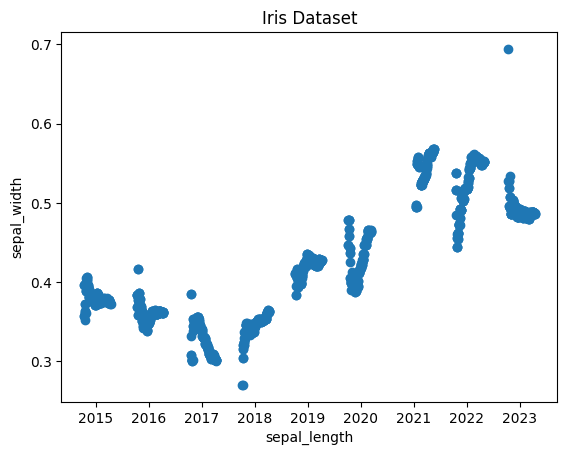

In [26]:
df2 = df.drop('SEA', axis=1)
df2= df2.drop('VGK', axis=1)
df2.dropna()

fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df2['game_date'], df2['COL'])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')

In [ ]:


array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=seed)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()